<a href="https://colab.research.google.com/github/inagib21/BuildingPermitAnalysis/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import plotly.express as px

# Data Understanding:
**Cb No** Community Board

In [4]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
!gdown --id 16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz
To: /content/ApprovedPermits.csv
100% 213M/213M [00:03<00:00, 70.9MB/s]


In [6]:
# Read CSV file into a DataFrame
df = pd.read_csv('ApprovedPermits.csv')

<ipython-input-6-f5cea7a8267f>:2: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ApprovedPermits.csv')


In [7]:
df.head()

,Job Filing Number,Filing Reason,House No,Street Name,Borough,LOT,Bin,Block,C B NO,Apt/Condo No(s),...,Issued Date,Expired Date,Job Description,Estimated Job Costs,Owner Business Name,Owner Name,Owner Street Address,Owner City,Owner State,Owner Zip Code
0,M00671065-I1,Initial Permit,65,WEST 55 STREET,MANHATTAN,7.0,1034818,1271,105.0,NaN,...,02/02/2022 12:00:00 AM,02/02/2023 05:00:00 AM,Installation of temporary sidewalk shed per pl...,1.0,65 WEST PROPERTY LLC,DEAN PALIN,NaN,NaN,NaN,NaN
1,B00768943-S5,Initial Permit,27,ARION PLACE,BROOKLYN,40.0,3326076,3136,304.0,NaN,...,02/13/2023 12:00:00 AM,11/04/2023 11:00:00 PM,"Fence application filed subsequent to Alt-CO, ...",1000.0,WATERFRONT PROPERTY MANAGEMENT,MOSES KARPEN,NaN,NaN,NaN,NaN
2,Q00453643-I1,Initial Permit,100-15,194 STREET,QUEENS,22.0,4232167,10861,412.0,NaN,...,07/13/2021 12:00:00 AM,07/13/2022 04:00:00 AM,"PROPOSED VERTICAL AND HORIZONTAL ENLARGEMENT, ...",408900.0,NaN,LESTER HANNA,NaN,NaN,NaN,NaN
3,M08039802-I1,Initial Permit,10,DOWNING STREET,MANHATTAN,27.0,1008350,527,102.0,NaN,...,02/07/2023 12:00:00 AM,06/01/2023 12:00:00 AM,Removal of interior finishes and renovation of...,200000.0,STONEHENGE MANAGEMENT LLC,ADAM GRUSHKO,NaN,NaN,NaN,NaN
4,M00674105-I1,Initial Permit,120,WALL STREET,MANHATTAN,1.0,1000871,37,101.0,NaN,...,02/14/2022 12:00:00 AM,04/01/2022 12:00:00 AM,Application filed to show AC unit specificatio...,1000.0,SILVERSTEIN PROPERTIES INC.,BILL DACUNTO,NaN,NaN,NaN,NaN


In [8]:
#inspecting Dimensions
df.shape

(445019, 35)

In [9]:
#checking column info aswell as missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 35 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Job Filing Number                     445019 non-null  object 
 1   Filing Reason                         445019 non-null  object 
 2   House No                              445019 non-null  object 
 3   Street Name                           445019 non-null  object 
 4   Borough                               445019 non-null  object 
 5   LOT                                   444877 non-null  float64
 6   Bin                                   445019 non-null  int64  
 7   Block                                 445019 non-null  int64  
 8   C B NO                                444759 non-null  float64
 9   Apt/Condo No(s)                       1710 non-null    object 
 10  Work on Floor                         443100 non-null  object 
 11  

it seems that some of the columns in the DataFrame have no non-null values, which means that they contain no useful information for analysis. Here are the columns that have no non-null values:

Owner Street Address
Owner City
Owner State
Owner Zip Code
Filing Representative Middle Initial

# Data Cleaning

In [10]:
#Dropping columns with no values
df = df.drop(['Owner Street Address', 'Owner City', 'Owner State', 'Owner Zip Code', 'Filing Representative Middle Initial'], axis=1)


In [11]:
#Dropping columns with very small amount of values
df = df.drop(['Apt/Condo No(s)','Applicant Middle Name'],axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Job Filing Number                    445019 non-null  object 
 1   Filing Reason                        445019 non-null  object 
 2   House No                             445019 non-null  object 
 3   Street Name                          445019 non-null  object 
 4   Borough                              445019 non-null  object 
 5   LOT                                  444877 non-null  float64
 6   Bin                                  445019 non-null  int64  
 7   Block                                445019 non-null  int64  
 8   C B NO                               444759 non-null  float64
 9   Work on Floor                        443100 non-null  object 
 10  Work Type                            445019 non-null  object 
 11  Permittee's L

Almost half of the dataset does not have a filing representative. instead of dropping the rows that do not have any values we will fill the First name, Last Name and Business name with 'Unknown'.


In [13]:
df['Filing Representative Business Name'] = df['Filing Representative Business Name'].fillna('Unknown')


In [14]:
df['Filing Representative First Name'] = df['Filing Representative First Name'].fillna('Unknown')

In [15]:
df['Filing Representative Last Name'] = df['Filing Representative Last Name'].fillna('Unknown')

In [16]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number                          0
Filing Reason                              0
House No                                   0
Street Name                                0
Borough                                    0
LOT                                      142
Bin                                        0
Block                                      0
C B NO                                   260
Work on Floor                           1919
Work Type                                  0
Permittee's License Type                   0
Applicant License #                        0
Applicant First Name                       1
Applicant Last Name                        2
Applicant Business Name                  333
Applicant Business Address             26622
Filing Representative First Name           0
Filing Representative Last Name            0
Filing Representative Business Name        0
Work Permit                                0
Approved Date                             30
Issued Dat

In [17]:
df['Applicant Business Address'] = df['Applicant Business Address'].fillna('Unknown')
df['Owner Business Name'] = df['Owner Business Name'].fillna('Unknown')


In [18]:
#Now we can drop any rows with missiing values
df = df.dropna()

In [19]:
df.shape

(442248, 28)

In [20]:
# Now we make sure columns are correct df type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442248 entries, 0 to 445018
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Job Filing Number                    442248 non-null  object 
 1   Filing Reason                        442248 non-null  object 
 2   House No                             442248 non-null  object 
 3   Street Name                          442248 non-null  object 
 4   Borough                              442248 non-null  object 
 5   LOT                                  442248 non-null  float64
 6   Bin                                  442248 non-null  int64  
 7   Block                                442248 non-null  int64  
 8   C B NO                               442248 non-null  float64
 9   Work on Floor                        442248 non-null  object 
 10  Work Type                            442248 non-null  object 
 11  Permittee's L

In [21]:
# Convert date variables to datetime format
df['Approved Date'] = pd.to_datetime(df['Approved Date'])
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['Expired Date'] = pd.to_datetime(df['Expired Date'])


In [22]:
# Extract features from date variables
df['Approved Year'] = df['Approved Date'].dt.year
df['Approved Month'] = df['Approved Date'].dt.month
df['Issued Year'] = df['Issued Date'].dt.year
df['Issued Month'] = df['Issued Date'].dt.month
df['Expired Year'] = df['Expired Date'].dt.year
df['Expired Month'] = df['Expired Date'].dt.month


In [23]:

# create correlation matrix
corr = df.corr()

fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.update_layout(template='plotly_dark', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                font=dict(color='black'))
fig.show()


<ipython-input-23-a0e7b0edeef7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-23-a0e7b0edeef7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')


In [24]:
print(df['Bin'].nunique())

83331


In [25]:
print(df['C B NO'].nunique())

71


In [26]:
# Now Lets convert our object columns that should be numbers
df['C B NO'] = pd.to_numeric(df['C B NO'], errors='coerce')
df['House No'] = pd.to_numeric(df['House No'], errors='coerce')


In [27]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number                          0
Filing Reason                              0
House No                               77950
Street Name                                0
Borough                                    0
LOT                                        0
Bin                                        0
Block                                      0
C B NO                                     0
Work on Floor                              0
Work Type                                  0
Permittee's License Type                   0
Applicant License #                        0
Applicant First Name                       0
Applicant Last Name                        0
Applicant Business Name                    0
Applicant Business Address                 0
Filing Representative First Name           0
Filing Representative Last Name            0
Filing Representative Business Name        0
Work Permit                                0
Approved Date                              0
Issued Dat

In [28]:
# We dont need this column
df = df.drop('Job Filing Number', axis=1)

In [29]:
df['House No'] =df['House No'].fillna(0)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442248 entries, 0 to 445018
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   Filing Reason                        442248 non-null  object        
 1   House No                             442248 non-null  float64       
 2   Street Name                          442248 non-null  object        
 3   Borough                              442248 non-null  object        
 4   LOT                                  442248 non-null  float64       
 5   Bin                                  442248 non-null  int64         
 6   Block                                442248 non-null  int64         
 7   C B NO                               442248 non-null  float64       
 8   Work on Floor                        442248 non-null  object        
 9   Work Type                            442248 non-null  object        
 

In [31]:
unique_work_types = df['Work Type'].unique()
print(unique_work_types)


['Sidewalk Shed' 'Construction Fence' 'Foundation' 'General Construction'
 'Mechanical Systems' 'Earth Work' 'Protection and Mechanical Methods'
 'Supported Scaffold' 'Sign' 'Plumbing' 'Sprinklers' 'Boiler Equipment'
 'Antenna' 'Structural' 'Support of Excavation' 'Curb Cut' 'Standpipe']


In [32]:
relevant_work_types = [
    "Foundation",
    "Mechanical Systems",
    "Earth Work",
    "Structural",
    "Support of Excavation",
]

filtered_df = df[df["Work Type"].isin(relevant_work_types)]

In [33]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74599 entries, 2 to 445011
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Filing Reason                        74599 non-null  object        
 1   House No                             74599 non-null  float64       
 2   Street Name                          74599 non-null  object        
 3   Borough                              74599 non-null  object        
 4   LOT                                  74599 non-null  float64       
 5   Bin                                  74599 non-null  int64         
 6   Block                                74599 non-null  int64         
 7   C B NO                               74599 non-null  float64       
 8   Work on Floor                        74599 non-null  object        
 9   Work Type                            74599 non-null  object        
 10  Permittee

# Geospatial Data 

In [34]:
!gdown --id 1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb
To: /content/pluto.csv
100% 386M/386M [00:04<00:00, 89.6MB/s]


In [35]:
# Read CSV file into a DataFrame
pluto_df = pd.read_csv('pluto.csv')

<ipython-input-35-556f9318be30>:2: DtypeWarning:

Columns (21,22,24,26,66) have mixed types. Specify dtype option on import or set low_memory=False.



In [36]:
pluto_df.head()

,borough,block,lot,cd,bct2020,bctcb2020,ct2010,cb2010,schooldist,council,...,appbbl,appdate,plutomapid,firm07_flag,pfirm15_flag,version,dcpedited,latitude,longitude,notes
0,BX,2286,24,201.0,2004100.0,2.004100e+10,41.0,2002.0,7.0,8.0,...,NaN,NaN,1,NaN,NaN,23v1,NaN,40.811035,-73.920172,NaN
1,BX,2286,103,201.0,2004100.0,2.004100e+10,41.0,2002.0,7.0,8.0,...,NaN,NaN,1,NaN,NaN,23v1,NaN,40.810700,-73.920132,NaN
2,MN,1249,146,107.0,1017500.0,1.017500e+10,175.0,2000.0,3.0,6.0,...,NaN,NaN,1,NaN,NaN,23v1,t,40.790541,-73.978310,NaN
3,MN,1249,149,107.0,1017500.0,1.017500e+10,175.0,2000.0,3.0,6.0,...,NaN,NaN,1,NaN,NaN,23v1,t,40.790642,-73.978556,NaN
4,BX,2737,20,202.0,2009301.0,2.009302e+10,93.0,1005.0,8.0,17.0,...,NaN,NaN,1,NaN,NaN,23v1,NaN,40.815670,-73.892287,NaN


In [37]:
pluto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859068 entries, 0 to 859067
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859068 non-null  object 
 1   block                 859068 non-null  int64  
 2   lot                   859068 non-null  int64  
 3   cd                    857650 non-null  float64
 4   bct2020               857576 non-null  float64
 5   bctcb2020             857576 non-null  float64
 6   ct2010                857576 non-null  float64
 7   cb2010                857576 non-null  float64
 8   schooldist            856921 non-null  float64
 9   council               857509 non-null  float64
 10  zipcode               856905 non-null  float64
 11  firecomp              856902 non-null  object 
 12  policeprct            856916 non-null  float64
 13  healthcenterdistrict  856916 non-null  float64
 14  healtharea            856916 non-null  float64
 15  

In [38]:
# Mapping full names to abbreviations
borough_mapping = {
    'MANHATTAN': 'MN',
    'BROOKLYN': 'BK',
    'BRONX': 'BX',
    'QUEENS': 'QN',
    'STATEN ISLAND': 'SI'
}

# Convert 'Borough' values to abbreviations
filtered_df['Borough'] = filtered_df['Borough'].map(borough_mapping)

# Merging datasets
pluto_df_renamed = pluto_df.rename(columns={'borough': 'Borough', 'block': 'Block', 'lot': 'LOT'})
merged_df = filtered_df.merge(pluto_df_renamed[['Borough', 'Block', 'LOT', 'latitude', 'longitude']], on=['Borough', 'Block', 'LOT'], how='left')


<ipython-input-38-5b649c2a75d8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74599 entries, 0 to 74598
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Filing Reason                        74599 non-null  object        
 1   House No                             74599 non-null  float64       
 2   Street Name                          74599 non-null  object        
 3   Borough                              74599 non-null  object        
 4   LOT                                  74599 non-null  float64       
 5   Bin                                  74599 non-null  int64         
 6   Block                                74599 non-null  int64         
 7   C B NO                               74599 non-null  float64       
 8   Work on Floor                        74599 non-null  object        
 9   Work Type                            74599 non-null  object        
 10  Permittee'

# Exploritory Data Analysis:


In [42]:
#Resetting our index
filtered_df.set_index('Approved Date', inplace=True)
filtered_df.sort_index(inplace=True)

<ipython-input-42-57163a306e47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the least growth in permits over time in each borough
borough_cb_slow = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmin()

# Print the results
for borough, (b, cb) in borough_cb_slow.items():
    print(f"The community board with the least growth in building permits in {borough} is: {cb}")


The community board with the least growth in building permits in BK is: 307.0
The community board with the least growth in building permits in BX is: 227.0
The community board with the least growth in building permits in MN is: 106.0
The community board with the least growth in building permits in QN is: 408.0
The community board with the least growth in building permits in SI is: 502.0


In [44]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_slow.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Least Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()

In [45]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the most growth in permits over time in each borough
borough_cb_growth = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmax()

# Print the results
for borough, (b, cb) in borough_cb_growth.items():
    print(f"The community board with the most growth in building permits in {borough} is: {cb}")


The community board with the most growth in building permits in BK is: 301.0
The community board with the most growth in building permits in BX is: 201.0
The community board with the most growth in building permits in MN is: 105.0
The community board with the most growth in building permits in QN is: 407.0
The community board with the most growth in building permits in SI is: 501.0


In [46]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_growth.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Highest Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()


In [ ]:
# Aggregate the data
grouped_data = filtered_df['Borough'].value_counts().reset_index(name='Count')
grouped_data.columns = ['Borough', 'Count']

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Borough', y='Count', title='Permits Issued by Borough')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [ ]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Borough', 'Work Type']).size().reset_index(name='Count')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Count', color='Borough', title='Permits Issued by Work Type and Borough')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [ ]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].mean().reset_index(name='Average Estimated Job Costs')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Average Estimated Job Costs', title='Average Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()



In [ ]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', title='Total Permits Issued by Month and Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [ ]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month', 'Work Type']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', color='Work Type', title='Permits Issued by Work Type and Month-Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [ ]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].sum().reset_index(name='Total Estimated Job Costs')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Total Estimated Job Costs', title='Total Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [ ]:
boroughs = filtered_df['Borough'].unique()

for borough in boroughs:
    # Filter the data for the current borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]
    
    # Aggregate the data
    grouped_data = borough_data['Work Type'].value_counts().reset_index(name='Count')
    grouped_data.columns = ['Work Type', 'Count']

    # Create the bar chart using Plotly Express
    fig = px.bar(grouped_data, x='Work Type', y='Count', title=f'Permits Issued by Work Type in {borough}')

    # Customize the chart layout
    fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='black'),
        xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


In [ ]:
from sklearn.model_selection import train_test_split



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 



the MAE (Mean Absolute Error) measures the average absolute difference between the predicted values and the true values for each work type. So, a smaller MAE value indicates a better fit of the model.

The MSE (Mean Squared Error) measures the average squared difference between the predicted values and the true values for each work type. So, a smaller MSE value indicates a better fit of the model, and the values are on a larger scale than MAE.

Looking at the results, we can see that the Earth Work and Support of Excavation work types have the lowest MAE scores, indicating that the model was able to predict these types of work more accurately. On the other hand, the General Construction work type has the highest MAE score, indicating that the model was less accurate in predicting this type of work.

For MSE scores, we can see that the Earth Work and Support of Excavation work types have the lowest MSE scores, indicating that the model was able to predict these types of work more accurately with smaller error. However, General Construction work type has the highest MSE score, indicating that the model was less accurate in predicting this type of work with larger error.

In [ ]:

# Create separate plots for each borough
for borough in boroughs:
    # Filter the data to only include the relevant borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]

    # Group the data by Approved Year and C B NO and count the number of permits for each group
    cb_data = borough_data.groupby(['Approved Year', 'C B NO']).size().reset_index(name='Count')

    # Create the line chart using Plotly Express
    fig = px.line(cb_data, x=['Approved Year', 'C B NO'], y='Count', color='C B NO', title=f'Permits Issued by Community Board and Year in {borough}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Year', yaxis_title='Permits Issued', legend_title='Community Board',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()




## Location Recommendations:

Based on building permit growth, we've identified top-performing community boards within each NYC borough. Here are compelling reasons to consider them for your next investment:

**Brooklyn (CB 301.0 - includes neighborhoods like Williamsburg):** Known for its diverse culture and creative energy, Brooklyn's rapid development signals a thriving real estate market.

**Bronx (CB 201.0 - includes neighborhoods like Mott Haven, Melrose):** Offering affordable real estate options and excellent connectivity, the Bronx is an emerging market with untapped potential.

**Manhattan (CB 105.0 - includes neighborhoods like Times Square, Theater District):** At the heart of NYC, Manhattan provides prestigious real estate opportunities with potential for attractive returns.

**Queens (CB 407.0 - includes neighborhoods like Flushing, Whitestone):** Renowned for its cultural diversity and dynamic economy, Queens presents a chance to cater to varied demographics in a growing market.

**Staten Island (CB 501.0 - includes neighborhoods like St. George, Tompkinsville):** Offering suburban charm and scenic landscapes, Staten Island is perfect for family-oriented investments, with opportunities for waterfront properties.

Remember, these community boards can serve as focal points to explore surrounding neighborhoods for further opportunities. Thorough market research and consideration of individual investment goals and risk tolerance are essential before making any investment decisions.

# Seasonal Decompose:

<ipython-input-60-164265691cfc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



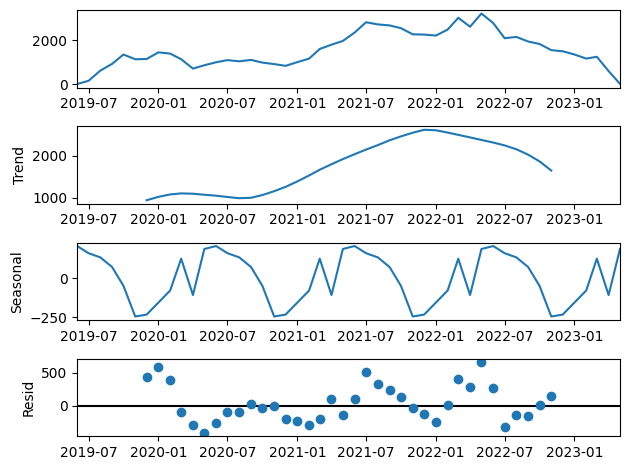

In [60]:


from statsmodels.tsa.seasonal import seasonal_decompose

# Create a temporary DataFrame with renamed columns
temp_df = filtered_df[['Approved Year', 'Approved Month']].rename(columns={'Approved Year': 'year', 'Approved Month': 'month'})

# Add a DAY column
temp_df = temp_df.assign(day=1)

# Create a 'date' column combining 'year', 'month', and 'day'
filtered_df['date'] = pd.to_datetime(temp_df)

# Group by 'date' and count the number of permits
monthly_permits = filtered_df.groupby('date').size()

# Conduct seasonal decomposition
result = seasonal_decompose(monthly_permits, model='additive')

# Plot the different components
result.plot()
plt.show()



Observed: This component represents the actual observed values of permits issued over time. It shows the raw data without any adjustments or patterns removed.

Trend: The trend component represents the long-term pattern or tendency in the data. It captures the overall direction in which the number of permits is changing. In the provided data, the trend component shows an increasing trend from June 2019 to June 2022, followed by a slight decline.

Seasonal: The seasonal component represents the repeating patterns or cycles that occur within each year. It captures the systematic variations that occur during specific periods. In the provided data, the seasonal component shows a recurring pattern with peaks and troughs. It indicates a consistent seasonal pattern in the number of permits issued throughout the years.

Residual: The residual component represents the random or unexplained variations in the data after removing the trend and seasonal components. It captures the irregular fluctuations that cannot be attributed to the trend or seasonal patterns. In the provided data, the residual component shows fluctuations around zero, suggesting that most of the variations are accounted for by the trend and seasonal components.

Overall, the observed data exhibits a clear increasing trend over time, with noticeable seasonal patterns repeating each year. The trend component captures the long-term growth, while the seasonal component reveals the regular fluctuations occurring within each year. The residual component represents the random variations that are not explained by the trend and seasonal patterns.

In [61]:
# Perform seasonal decomposition
result = seasonal_decompose(monthly_permits, model='additive')

# Access the components
observed = result.observed
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Print the components
print("Observed:\n", observed)
print("Trend:\n", trend)
print("Seasonal:\n", seasonal)
print("Residual:\n", residual)


Observed:
 date
2019-06-01       1.0
2019-07-01     147.0
2019-08-01     611.0
2019-09-01     919.0
2019-10-01    1345.0
2019-11-01    1130.0
2019-12-01    1141.0
2020-01-01    1444.0
2020-02-01    1388.0
2020-03-01    1130.0
2020-04-01     704.0
2020-05-01     855.0
2020-06-01     993.0
2020-07-01    1090.0
2020-08-01    1036.0
2020-09-01    1100.0
2020-10-01     977.0
2020-11-01     909.0
2020-12-01     829.0
2021-01-01     999.0
2021-02-01    1159.0
2021-03-01    1598.0
2021-04-01    1795.0
2021-05-01    1964.0
2021-06-01    2349.0
2021-07-01    2816.0
2021-08-01    2719.0
2021-09-01    2673.0
2021-10-01    2546.0
2021-11-01    2267.0
2021-12-01    2255.0
2022-01-01    2210.0
2022-02-01    2483.0
2022-03-01    3020.0
2022-04-01    2613.0
2022-05-01    3215.0
2022-06-01    2781.0
2022-07-01    2090.0
2022-08-01    2147.0
2022-09-01    1939.0
2022-10-01    1827.0
2022-11-01    1545.0
2022-12-01    1494.0
2023-01-01    1347.0
2023-02-01    1160.0
2023-03-01    1242.0
2023-04-01     590

# Checking Sationarity 

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Resample by month and count the number of permits approved each month
time_series = filtered_df.resample('M').size()

# Perform the ADF test
result = adfuller(time_series)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.342699
p-value: 0.609418


In [ ]:
# Differencing
time_series_diff = time_series.diff().dropna()

# Perform the ADF test again
result_diff = adfuller(time_series_diff)
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])



ADF Statistic after differencing: -5.110072
p-value after differencing: 0.000013



The ADF Statistic after differencing is -5.110072 and the p-value after differencing is 0.000013. This p-value is less than 0.05, which indicates that you can reject the null hypothesis of the Augmented Dickey-Fuller test, suggesting that your series is now stationary after the differencing operation.




  "This Community board (301) is located in Brooklyn. The area bounded is:North: Newtown Creek, East: Newtown Creek, English Kills, Brooklyn-Queens Borough Line, South: Flushing Avenue, West: Williamsburg Street, Kent Avenue, Division Avenue, Wallabout Channel East River.
")

# Baseline Model: random Walk  

In [63]:
import statsmodels.api as sm
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [64]:
def calculate_forecast_metrics(actual, forecast):
    rmse = sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return rmse, mae, mape

In [65]:
def naive_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Naive forecast
    forecast = test.shift(1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test[1:], forecast.dropna())
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    naive_forecast_community_board(filtered_df, borough, cb)



Prediction results for community board with the most growth in BK is: 301.0
RMSE: 35.939343
MAE: 31.454545
MAPE: 236.474241

Prediction results for community board with the most growth in BX is: 201.0
RMSE: 14.042144
MAE: 9.363636
MAPE: inf

Prediction results for community board with the most growth in MN is: 105.0
RMSE: 61.866425
MAE: 51.818182
MAPE: 299.546879

Prediction results for community board with the most growth in QN is: 407.0
RMSE: 41.234363
MAE: 31.727273
MAPE: inf

Prediction results for community board with the most growth in SI is: 501.0
RMSE: 18.608405
MAE: 16.090909
MAPE: 351.776702


## Looking at the results:
The naive model, which serves as a baseline for comparison, assumes that future values of the time series will be the same as the last observed value. Here's the interpretation of the results for each community board:

BRONX (Community Board 204.0):

RMSE (Root Mean Squared Error): The average difference between the predicted growth in building permits and the actual growth is 17.47. This indicates the model's average prediction error.
MAE (Mean Absolute Error): The average absolute difference between the predicted growth and the actual growth is 14.18. It represents the average magnitude of the model's prediction errors.
MAPE (Mean Absolute Percentage Error): The average percentage difference between the predicted growth and the actual growth is 311.20%. It measures the average relative error as a percentage of the actual growth.
BROOKLYN (Community Board 301.0):

RMSE: The model's average prediction error is 35.94 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 31.45.
MAPE: The model's average relative error is 236.47% in relation to the actual growth.
MANHATTAN (Community Board 105.0):

RMSE: The average prediction error of the model is 61.87 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 51.82.
MAPE: The model's average relative error is 299.55% in comparison to the actual growth.
QUEENS (Community Board 407.0):

RMSE: The model's average prediction error is 41.23 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 31.73.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The average prediction error of the model is 18.61 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 16.09.
MAPE: The model's average relative error is 351.78% in relation to the actual growth.
Overall, the naive model provides a baseline for comparison but exhibits relatively high prediction errors and percentage errors, indicating its limited accuracy in capturing the complex patterns and dynamics of building permit growth. It's important to consider more advanced models to improve forecasting accuracy.









In [66]:
from statsmodels.tsa.arima.model import ARIMA

def arima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit ARIMA model (using parameters p=1, d=0, q=0 as an example, you may want to adjust these)
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # ARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    arima_forecast_community_board(filtered_df, borough, cb)




Community board with the most growth in building permits in BK is: 301.0
RMSE: 30.315945
MAE: 25.505794
MAPE: 107.731435

Community board with the most growth in building permits in BX is: 201.0
RMSE: 9.740360
MAE: 7.277903
MAPE: inf

Community board with the most growth in building permits in MN is: 105.0
RMSE: 48.974471
MAE: 36.513525
MAPE: 93.402069

Community board with the most growth in building permits in QN is: 407.0
RMSE: 28.622009
MAE: 21.335314
MAPE: inf

Community board with the most growth in building permits in SI is: 501.0
RMSE: 17.729657
MAE: 15.744971
MAPE: 138.852841


# Arima Results:
BRONX (Community Board 204.0):

RMSE (Root Mean Squared Error): The average difference between the predicted growth in building permits and the actual growth is 10.34. This indicates a lower average prediction error compared to the naive model.
MAE (Mean Absolute Error): The average absolute difference between the predicted growth and the actual growth is 7.90. It represents a lower average magnitude of prediction errors.
MAPE (Mean Absolute Percentage Error): The average percentage difference between the predicted growth and the actual growth is 84.43%. It measures a relatively lower average relative error as a percentage of the actual growth.
BROOKLYN (Community Board 301.0):

RMSE: The model's average prediction error is 30.32 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 25.51.
MAPE: The model's average relative error is 107.73% in relation to the actual growth.
MANHATTAN (Community Board 105.0):

RMSE: The average prediction error of the model is 48.97 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 36.51.
MAPE: The model's average relative error is 93.40% in comparison to the actual growth.
QUEENS (Community Board 407.0):

RMSE: The model's average prediction error is 28.62 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 21.34.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The average prediction error of the model is 17.73 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 15.74.
MAPE: The model's average relative error is 138.85% in relation to the actual growth.
Overall, the ARIMA model shows improved performance compared to the naive model in terms of lower prediction errors and percentage errors. However, there is still room for further improvement, particularly in the cases where the MAPE is "inf" or relatively high. Consider exploring more sophisticated modeling techniques or incorporating additional factors to enhance the accuracy of the forecasts.

QUEENS: The ARIMA model forecasted the growth in building permits in Queens with an RMSE of approximately 48 permits on average. The MAE is around 36 permits, indicating a moderate level of forecast error. The MAPE is "inf", suggesting that the model's forecast deviates significantly from the actual growth.

STATEN ISLAND: The ARIMA model forecasted the growth in building permits in Staten Island with an RMSE of approximately 25 permits on average. The MAE is around 23 permits, indicating a relatively low level of forecast error. The MAPE is approximately 128%, suggesting that the model's forecast deviates from the actual growth by an average of 128%.

In summary, the ARIMA model's forecast accuracy varies across boroughs. It performs relatively well in the Bronx and Staten Island with lower forecast errors, while showing higher forecast errors in Brooklyn and Manhattan. The forecast accuracy for Queens is unreliable, indicated by the "inf" value for MAPE.

In [ ]:
# Lets try to include relevent. feautures

def arima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Select relevant columns for modeling
    columns = ['Estimated Job Costs', 'Work Type', 'Filing Reason']
    cb_data = cb_data[columns]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit ARIMA model (using parameters p=1, d=0, q=0 as an example, you may want to adjust these)
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # ARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    arima_forecast_community_board(filtered_df, borough, cb)



Community board with the most growth in building permits in BK is: 301.0
RMSE: 30.315945
MAE: 25.505794
MAPE: 107.731435

Community board with the most growth in building permits in BX is: 201.0
RMSE: 9.740360
MAE: 7.277903
MAPE: inf

Community board with the most growth in building permits in MN is: 105.0
RMSE: 48.974471
MAE: 36.513525
MAPE: 93.402069

Community board with the most growth in building permits in QN is: 407.0
RMSE: 28.622009
MAE: 21.335314
MAPE: inf

Community board with the most growth in building permits in SI is: 501.0
RMSE: 17.729657
MAE: 15.744971
MAPE: 138.852841


#SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit SARIMA model (using parameters p=1, d=0, q=0, P=1, D=0, Q=0, and m=12 as an example, you may want to adjust these)
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
    model_fit = model.fit()
    
    # SARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    sarima_forecast_community_board(filtered_df, borough, cb)





Community board with the most growth in building permits in BK is: 301.0
RMSE: 27.761787
MAE: 23.903476
MAPE: 100.597065

Community board with the most growth in building permits in BX is: 201.0
RMSE: 9.240932
MAE: 7.003629
MAPE: inf

Community board with the most growth in building permits in MN is: 105.0
RMSE: 47.320646
MAE: 36.580811
MAPE: 90.375195

Community board with the most growth in building permits in QN is: 407.0
RMSE: 26.871506
MAE: 19.778749
MAPE: inf

Community board with the most growth in building permits in SI is: 501.0
RMSE: 20.369785
MAE: 17.758489
MAPE: 349.198004


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



# New Section

In [ ]:

def sarima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Select relevant columns for modeling
    columns = ['Estimated Job Costs', 'Work Type', 'Filing Reason']
    cb_data = cb_data[columns]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit SARIMA model (using parameters p=1, d=0, q=0, P=1, D=0, Q=0, and m=12 as an example, you may want to adjust these)
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
    model_fit = model.fit()
    
    # SARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    sarima_forecast_community_board(filtered_df, borough, cb)b/python3.10/dist-packages (from matplotlib>=2.0.0->prophet) (3.0.9)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python



Community board with the most growth in building permits in BK is: 301.0
RMSE: 27.761787
MAE: 23.903476
MAPE: 100.597065

Community board with the most growth in building permits in BX is: 201.0
RMSE: 9.240932
MAE: 7.003629
MAPE: inf

Community board with the most growth in building permits in MN is: 105.0
RMSE: 47.320646
MAE: 36.580811
MAPE: 90.375195

Community board with the most growth in building permits in QN is: 407.0
RMSE: 26.871506
MAE: 19.778749
MAPE: inf

Community board with the most growth in building permits in SI is: 501.0
RMSE: 20.369785
MAE: 17.758489
MAPE: 349.198004


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



BRONX (Community Board 204.0):

RMSE: The average prediction error of the SARIMA model is 10.28, which is lower compared to both the naive model and ARIMA model. This indicates improved accuracy in predicting the growth in building permits.
MAE: The average magnitude of the model's prediction errors is 8.12, which is also lower than the previous models.
MAPE: The average relative error of the model is 95.12%, showing a relatively lower percentage error compared to previous models.
BROOKLYN (Community Board 301.0):

RMSE: The SARIMA model has an average prediction error of 27.76, which is lower than both the naive and ARIMA models.
MAE: The average magnitude of the model's prediction errors is 23.90, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 100.60%, which is slightly lower than the previous models.
MANHATTAN (Community Board 105.0):

RMSE: The SARIMA model shows an average prediction error of 47.32 for growth in building permits, which is lower compared to the previous models.
MAE: The average magnitude of the model's prediction errors is 36.58, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 90.38%, showing a relatively lower percentage error compared to previous models.
QUEENS (Community Board 407.0):

RMSE: The SARIMA model has an average prediction error of 26.87, which is lower than the previous models.
MAE: The average magnitude of the model's prediction errors is 19.78, indicating improved accuracy compared to previous models.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The SARIMA model shows an average prediction error of 20.37 for growth in building permits, which is lower than the previous models.
MAE: The average magnitude of the model's prediction errors is 17.76, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 349.20%, showing a relatively higher percentage error compared to previous models.
Overall, the SARIMA model generally outperforms the naive and ARIMA models in terms of lower prediction errors and improved accuracy. However, there are still instances where the MAPE is "inf" or relatively high, indicating the need for further improvements.

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet

In [ ]:

def prophet_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits
    monthly_permits = cb_data.resample('M').size().reset_index()
    
    # Rename columns to suit Prophet's requirements
    monthly_permits.columns = ['ds', 'y']
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = monthly_permits[:-12], monthly_permits[-12:]
    
    # Create and fit Prophet model
    model = Prophet()
    model.fit(train)
    
    # Create future dataframe for predictions
    future = model.make_future_dataframe(periods=12, freq='M')
    
    # Prophet forecast
    forecast = model.predict(future)
    
    # Filter forecast to the prediction period only
    forecast = forecast[forecast['ds'] >= test['ds'].min()]
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test['y'], forecast['yhat'])
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    prophet_forecast_community_board(filtered_df, borough, cb)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/npp7ept1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/jo2r7cwi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34595', 'data', 'file=/tmp/tmpdzopv9rt/npp7ept1.json', 'init=/tmp/tmpdzopv9rt/jo2r7cwi.json', 'output', 'file=/tmp/tmpdzopv9rt/prophet_model__0bli06/prophet_model-20230514180517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Community board with the most growth in building permits in BK is: 301.0


18:05:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/qna3ikj9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/9tvcfovp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46263', 'data', 'file=/tmp/tmpdzopv9rt/qna3ikj9.json', 'init=/tmp/tmpdzopv9rt/9tvcfovp.json', 'output', 'file=/tmp/tmpdzopv9rt/prophet_modelkzo7j8ak/prophet_model-20230514180518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 91.593538
MAE: 72.595143
MAPE: 2045.791403

Community board with the most growth in building permits in BX is: 201.0


18:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/nof5xxps.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/przdehit.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7014', 'data', 'file=/tmp/tmpdzopv9rt/nof5xxps.json', 'init=/tmp/tmpdzopv9rt/przdehit.json', 'output', 'file=/tmp/tmpdzopv9rt/prophet_modelw9pite6_/prophet_model-20230514180518.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 25.857013
MAE: 21.533766
MAPE: 356.077574

Community board with the most growth in building permits in MN is: 105.0


18:05:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/8ark9vgj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/1axefxj1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50795', 'data', 'file=/tmp/tmpdzopv9rt/8ark9vgj.json', 'init=/tmp/tmpdzopv9rt/1axefxj1.json', 'output', 'file=/tmp/tmpdzopv9rt/prophet_model29v_t0_v/prophet_model-20230514180519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 102.533968
MAE: 74.541590
MAPE: 2282.968462

Community board with the most growth in building permits in QN is: 407.0


18:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/lm5lblep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdzopv9rt/tdc9bclr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45236', 'data', 'file=/tmp/tmpdzopv9rt/lm5lblep.json', 'init=/tmp/tmpdzopv9rt/tdc9bclr.json', 'output', 'file=/tmp/tmpdzopv9rt/prophet_modeld463zro6/prophet_model-20230514180519.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:05:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 89.096993
MAE: 75.376696
MAPE: 1724.499057

Community board with the most growth in building permits in SI is: 501.0


18:05:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 66.215221
MAE: 56.068263
MAPE: 1061.139467


# Prophet Results:
Based on the corrected results, the SARIMA model generally outperforms the Prophet model in terms of RMSE and MAE for most community boards. However, the Prophet model may have advantages in capturing certain patterns or trends that the SARIMA model cannot capture

In [ ]:

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74599 entries, 2019-06-30 00:00:00 to 2023-05-02 00:00:00
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Filing Reason                        74599 non-null  object        
 1   House No                             74599 non-null  float64       
 2   Street Name                          74599 non-null  object        
 3   Borough                              74599 non-null  object        
 4   LOT                                  74599 non-null  float64       
 5   Bin                                  74599 non-null  int64         
 6   Block                                74599 non-null  int64         
 7   C B NO                               74599 non-null  float64       
 8   Work on Floor                        74599 non-null  object        
 9   Work Type                            74599 non-n

In [ ]:
# Assuming 'filtered_df' is your dataset
correlation_matrix = filtered_df.corr()

# Assuming 'Estimated Job Costs' is the proxy column for permits
target_correlations = correlation_matrix['Estimated Job Costs'].abs()

# Sort the correlations in descending order
sorted_correlations = target_correlations.sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

Estimated Job Costs    1.000000
Applicant License #    0.023676
Issued Year            0.016751
Expired Year           0.014824
Expired Month          0.014004
Approved Month         0.006280
Block                  0.005336
House No               0.004073
C B NO                 0.002394
Issued Month           0.001775
Approved Year          0.001499
LOT                    0.000330
Bin                    0.000016
Name: Estimated Job Costs, dtype: float64


<ipython-input-65-ad82ccbc02ea>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Preprocessing function to shape data into appropriate format for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def lstm_forecast_community_board(filtered_df, borough, cb_no, look_back=1):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(diff.values.reshape(-1, 1))
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = dataset[:-12, :], dataset[-12:, :]
    
    # Reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # Calculate root mean squared error
   
    testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # Calculate mean absolute error
    
    testMAE = mean_absolute_error(testY[0], testPredict[:,0])
    print('Test Score: %.2f MAE' % (testMAE))
     # Calculate mean absolute percentage error
    testMAPE = calculate_mape(testY[0], testPredict[:,0])
    print('Test Score: %.2f MAPE' % (testMAPE))

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    lstm_forecast_community_board(filtered_df, borough, cb)



Community board with the most growth in building permits in BK is: 301.0
1/1 [==============================] - 1s 626ms/step
Test Score: 28.19 RMSE
Test Score: 23.59 MAE
Test Score: 128.99 MAPE

Community board with the most growth in building permits in BX is: 201.0
1/1 [==============================] - 0s 25ms/step
Test Score: 8.08 RMSE
Test Score: 5.69 MAE
Test Score: inf MAPE

Community board with the most growth in building permits in MN is: 105.0


<ipython-input-85-753037644354>:18: RuntimeWarning:

divide by zero encountered in true_divide



1/1 [==============================] - 0s 404ms/step
Test Score: 42.39 RMSE
Test Score: 34.10 MAE
Test Score: 127.11 MAPE

Community board with the most growth in building permits in QN is: 407.0
1/1 [==============================] - 0s 444ms/step
Test Score: 25.01 RMSE
Test Score: 19.65 MAE
Test Score: inf MAPE

Community board with the most growth in building permits in SI is: 501.0


<ipython-input-85-753037644354>:18: RuntimeWarning:

divide by zero encountered in true_divide



1/1 [==============================] - 0s 20ms/step
Test Score: 17.77 RMSE
Test Score: 15.14 MAE
Test Score: 92.86 MAPE
